#### 1.) Import the Libraries

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
%matplotlib inline

In [198]:
path = r'C:\Users\dmlos\Achievement VI- Olist Business Analysis'

In [199]:
df = pd.read_csv(os.path.join(path, 'Olist-Original Data (Kaggle)', 'df_geolocation_customers_sellers_items_orders_clean_29.csv'))

## 2.) Clean the Data

In [200]:
df.columns

Index(['Unnamed: 0', 'Seller_Zip', 'Seller_Lat', 'Seller_Long', 'Customer_Zip',
       'Customer_Lat', 'Customer_Long', 'Customer_ID', 'Customer_Unique_ID',
       'Customer_City', 'Customer_State', 'Seller_ID', 'Seller_City',
       'Seller_State', 'Product_ID', 'Product_Category', 'Product_Weight(g)',
       'order_id', 'shipping_limit_date', 'Price', 'Freight_Value',
       'Payment_Type', 'review_id', 'Review_Score', 'Order_Status',
       'Delivery-Purchase_Time_Difference_Min',
       'Estimated-Purchase_Time_Difference_Min',
       'Approval-Purchase_Time_Difference_Min',
       'Carrier_Delivered-Order_Time_Difference_Min'],
      dtype='object')

In [201]:
df.head(20)

,Unnamed: 0,Seller_Zip,Seller_Lat,Seller_Long,Customer_Zip,Customer_Lat,Customer_Long,Customer_ID,Customer_Unique_ID,Customer_City,...,Price,Freight_Value,Payment_Type,review_id,Review_Score,Order_Status,Delivery-Purchase_Time_Difference_Min,Estimated-Purchase_Time_Difference_Min,Approval-Purchase_Time_Difference_Min,Carrier_Delivered-Order_Time_Difference_Min
0,0,1041,-23.544392,-46.639499,7082,-23.434352,-46.542897,f3a2d5b49cc090c679649818bc3f8e8e,43926f36ab519f97f4c9ce01c6183c9c,guarulhos,...,329.99,9.57,credit_card,fa0564acf6469e703a848bccd7be6de9,5,delivered,2707.266667,33208.433333,27.683333,723.433333
1,1,1041,-23.544392,-46.639499,4718,-15.820763,-47.901087,b84999d47cecf126835a23650ee4ecb8,04efac4a29eec2c5662b65e87291ec38,brasilia,...,579.00,19.15,credit_card,3322460564fc8f370b077b7e49d733ad,4,delivered,14353.433333,23275.033333,1128.650000,2314.033333
2,2,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,17.86,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333
3,3,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,17.86,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333
4,4,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,17.86,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333
5,5,1035,-23.541578,-46.641607,2565,-23.486109,-46.668268,f3e39e72d0f4d6e158f2ead42a5d4f43,9f0d87c00711095a2247e9aeaf6b6927,sao paulo,...,21.99,7.78,credit_card,ec22439217b0a66226e9117748f05dc6,4,delivered,5710.783333,20676.716667,17.883333,1618.866667
6,6,1035,-23.541578,-46.641607,13160,-22.559120,-47.165168,814b41afcb94cb533af057e10587da20,e75338700ec94ad6e634ee7fe05a14b4,artur nogueira,...,59.99,8.40,credit_card,f84b69ed2560aa2921b9a1eacafbb7fb,5,delivered,4802.333333,13573.583333,9.350000,1830.133333
7,7,1035,-23.541578,-46.641607,13160,-22.559120,-47.165168,814b41afcb94cb533af057e10587da20,e75338700ec94ad6e634ee7fe05a14b4,artur nogueira,...,59.99,8.40,voucher,f84b69ed2560aa2921b9a1eacafbb7fb,5,delivered,4802.333333,13573.583333,9.350000,1830.133333
8,8,1035,-23.541578,-46.641607,13270,-22.976619,-47.010715,30e44634f95a0c8423585cddd8d89c12,92ea89cc73adda82fbaf897a48947927,valinhos,...,24.89,7.39,credit_card,3718196ea4217ccc3afd692d0c3b3145,5,delivered,8817.616667,17849.116667,17.033333,3170.966667
9,9,1035,-23.541578,-46.641607,13270,-22.976619,-47.010715,30e44634f95a0c8423585cddd8d89c12,92ea89cc73adda82fbaf897a48947927,valinhos,...,24.89,7.39,credit_card,3718196ea4217ccc3afd692d0c3b3145,5,delivered,8817.616667,17849.116667,17.033333,3170.966667


In [202]:
df.shape

(116750, 29)

### Rename Columns to be Clearer

In [204]:
df1 = df.rename(columns = {'Seller_Zip':'Seller Zip','Seller_Lat':'Seller Lat','Seller_Long':'Seller Lng','Customer_Zip':'Customer Zip',
                     'Customer_Lat':'Customer Lat','Customer_Long':'Customer Lng','Customer_ID':'Customer ID','Customer_Unique_ID':'Customer Unique ID', 'Customer_City':'Customer City',
                     'Customer_State':'Customer State','Seller_ID':'Seller ID','Seller_City':'Seller City','Seller_State':'Seller State',
                     'Product_ID':'Product ID','Product_Category':'Product Category','Product_Weight(g)':'Product Weight(g)','order_id':'Order ID',
                     'Freight_Value':'Freight Value','Payment_Type':'Payment Type','review_id':'Review ID','Review_Score':'Review Score','Order_Status':'Order Status',
                     'Delivery-Purchase_Time_Difference_Min':'Total Delivery Time (Min)','Estimated-Purchase_Time_Difference_Min':'Est.Total Delivery Time (Min)','Approval-Purchase_Time_Difference_Min':'Purchase-to-Approval Time (Min)',
                     'Carrier_Delivered-Order_Time_Difference_Min':'Order-to-Carrier Time (Min)'})

#### Check for Missing Values

In [205]:
df1.isnull().sum()

Unnamed: 0                            0
Seller Zip                            0
Seller Lat                            0
Seller Lng                            0
Customer Zip                          0
Customer Lat                          0
Customer Lng                          0
Customer ID                           0
Customer Unique ID                    0
Customer City                         0
Customer State                        0
Seller ID                             0
Seller City                           0
Seller State                          0
Product ID                            0
Product Category                   1688
Product Weight(g)                    20
Order ID                              0
shipping_limit_date                   0
Price                                 0
Freight Value                         0
Payment Type                          0
Review ID                             0
Review Score                          0
Order Status                          0


In [206]:
#Impute the mean for the product weight as there are so few missing values. We'lld do the same for the Total Delivery Time, Purchase-to-Approval Time, and Order-to-Carrier Time columns.
df1['Product Weight(g)'].fillna(df1['Product Weight(g)'].median(), inplace = True)
df1['Total Delivery Time (Min)'].fillna(df1['Total Delivery Time (Min)'].median(), inplace = True)
df1['Purchase-to-Approval Time (Min)'].fillna(df1['Purchase-to-Approval Time (Min)'].median(), inplace = True)
df1['Order-to-Carrier Time (Min)'].fillna(df1['Order-to-Carrier Time (Min)'].median(), inplace = True)

In [207]:
df1.isnull().sum()

Unnamed: 0                            0
Seller Zip                            0
Seller Lat                            0
Seller Lng                            0
Customer Zip                          0
Customer Lat                          0
Customer Lng                          0
Customer ID                           0
Customer Unique ID                    0
Customer City                         0
Customer State                        0
Seller ID                             0
Seller City                           0
Seller State                          0
Product ID                            0
Product Category                   1688
Product Weight(g)                     0
Order ID                              0
shipping_limit_date                   0
Price                                 0
Freight Value                         0
Payment Type                          0
Review ID                             0
Review Score                          0
Order Status                          0


#### Check for Duplicate Values

In [208]:
dups = df1.duplicated()

In [209]:
dups.shape

(116750,)

#### Check for Extreme Values

##### Total Delivery Time (Min)

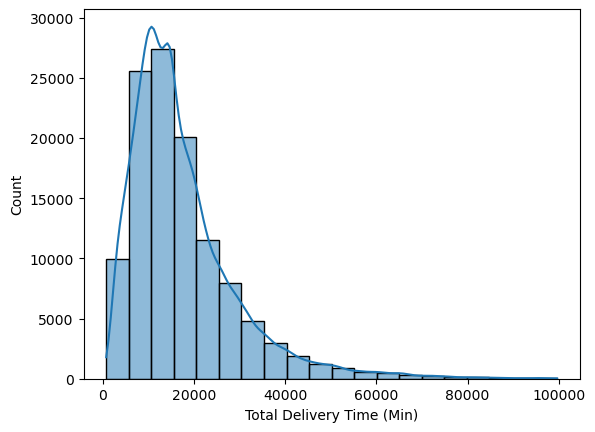

In [245]:
#Plot the values of the Total Delivery Time (Min) column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Total Delivery Time (Min)'], bins=20, kde = True)
plt.savefig('Total Delivery Time-Extreme Values Check.png')

In [211]:
#Check how many extreme values there are
df1[df1['Total Delivery Time (Min)'] > 100000]

,Unnamed: 0,Seller Zip,Seller Lat,Seller Lng,Customer Zip,Customer Lat,Customer Lng,Customer ID,Customer Unique ID,Customer City,...,Price,Freight Value,Payment Type,Review ID,Review Score,Order Status,Total Delivery Time (Min),Est.Total Delivery Time (Min),Purchase-to-Approval Time (Min),Order-to-Carrier Time (Min)
227,227,1026,-23.539495,-46.632844,28895,-22.502689,-41.924882,9cb739dc712ebd193e4eb94f3aeb8d20,9770456b4233cdf2363287ca2295650a,rio das ostras,...,1699.00,56.35,credit_card,fc63cb40e62e6243efef9a40f4487978,4,delivered,181630.983333,37612.083333,18.650000,181116.750000
1344,1344,1212,-23.537511,-46.637057,20551,-22.915371,-43.242996,d27cc8323ccff05b970998013b39e597,ce8b665ad7a00dfee2a4fbd19dedb82a,rio de janeiro,...,13.65,14.10,credit_card,ecd7b4b3060e422b5e07f2c012eb39ce,1,delivered,121896.450000,26118.083333,8.483333,2697.266667
1477,1477,1212,-23.537511,-46.637057,28740,-22.082361,-41.865673,938dbea1d465c3eee57f3dc8923dcb16,651da97b2f7575d76efe82f970e57116,conceicao de macabu,...,13.65,15.10,credit_card,ce1ee648483120fb4eb6e4690ad71b25,1,delivered,106683.516667,32400.166667,15.733333,3496.916667
3496,3496,2016,-23.500978,-46.627123,-12326,-7.998471,-34.896545,128dfb72bd29cd4dcc32059adb91c97e,0a3914c4e984aaedffc767c38030bed2,olinda,...,139.80,21.38,credit_card,1fd215a6ec72ea33cc318a0ad87b58c0,1,delivered,121205.383333,46639.983333,1431.466667,9059.600000
4692,4692,2310,-23.471944,-46.598645,4364,-9.974562,-67.809656,2d618e470c95c9b425cbb0cbc42683dd,f7d7fc0a59ef4363fdce6e3aa069d498,rio branco,...,74.99,27.58,credit_card,d4ed8fa83c53b696165bf10e145b1e4b,1,delivered,103965.566667,57938.783333,9.350000,3050.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114301,114301,89560,-27.000869,-51.145320,-1628,-4.967513,-39.011546,56033dc0fa885647a8cc84db067729ea,58c2385a00210b1ce3ad1542d4ab16fe,quixada,...,559.00,100.84,voucher,650f27998c7eb14a72302066cf6f8185,1,delivered,100809.516667,63625.583333,4017.316667,54777.716667
114408,114408,89520,-27.288615,-50.576966,9684,-17.317068,-48.485996,8985819d4414a7471d5be1dac2f08233,f236ed5552a1074b20a29af39a5c2bab,santa cruz de goias,...,252.00,22.21,boleto,c0699320afd96770c877a3d163b7b3a2,1,delivered,179996.833333,88605.866667,1466.083333,3014.883333
114409,114409,89520,-27.288615,-50.576966,9684,-17.317068,-48.485996,8985819d4414a7471d5be1dac2f08233,f236ed5552a1074b20a29af39a5c2bab,santa cruz de goias,...,252.00,22.21,boleto,c0699320afd96770c877a3d163b7b3a2,1,delivered,179996.833333,88605.866667,1466.083333,3014.883333
115833,115833,94910,-29.953554,-51.103414,22790,-23.011335,-43.450256,81e7a069c22d320446440504743833dc,80d0e258a93fb949afa542a87dc8f1a1,rio de janeiro,...,249.90,69.21,credit_card,42e81a8cda5e4b374cf5850229989070,1,delivered,101002.800000,33230.750000,23.916667,1114.850000


In [212]:
#Clean the extreme values
df1 = df1[df1['Total Delivery Time (Min)'] < 100000]

In [213]:
#Check the mean
df1['Total Delivery Time (Min)'].mean()

17621.27620510286

In [214]:
#Check the median
df1['Total Delivery Time (Min)'].median()

14663.983333333334

In [215]:
#Check the maximum
df1['Total Delivery Time (Min)'].max()

99602.76666666666

##### Est.Total Delivery Time (Min)

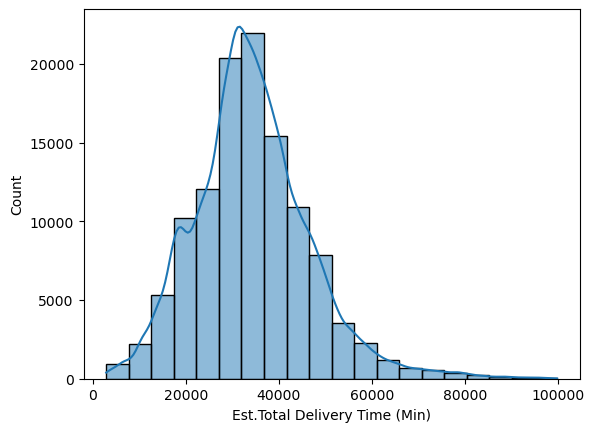

In [246]:
#Plot the values of the Est.Total Delivery Time (Min) column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Est.Total Delivery Time (Min)'], bins=20, kde = True)
plt.savefig('Est Total Delivery Time- Extreme Values Check.png')

In [217]:
#Check the mean
df1['Est.Total Delivery Time (Min)'].mean()

34335.408250467546

In [218]:
#Check the median
df1['Est.Total Delivery Time (Min)'].median()

33478.96666666667

In [219]:
#Check the median
df1['Est.Total Delivery Time (Min)'].max()

223395.06666666668

In [220]:
#Check the mean
df1[''].mean()

KeyError: ''

In [221]:
#Check the median
df1[''].median()

KeyError: ''

In [222]:
#Check the median
df1[''].max()

KeyError: ''

In [223]:
#Clean the extreme values
df1 = df1[df1['Est.Total Delivery Time (Min)'] < 100000]

##### Purchase-to-Approval Time (Min)

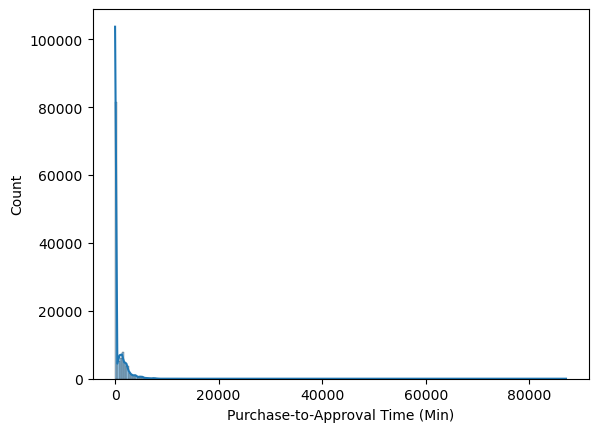

In [247]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Purchase-to-Approval Time (Min)'], bins=200, kde = True)
plt.savefig('Purchasse-to-Approval Time- Extreme Values Check.png')

In [225]:
#Check how many extreme values there are
df1[df1['Purchase-to-Approval Time (Min)'] > 10000]

,Unnamed: 0,Seller Zip,Seller Lat,Seller Lng,Customer Zip,Customer Lat,Customer Lng,Customer ID,Customer Unique ID,Customer City,...,Price,Freight Value,Payment Type,Review ID,Review Score,Order Status,Total Delivery Time (Min),Est.Total Delivery Time (Min),Purchase-to-Approval Time (Min),Order-to-Carrier Time (Min)
102,102,1026,-23.539495,-46.632844,5893,-23.658173,-46.790237,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,...,16.90,7.78,voucher,8e762254a11ad4292ec8fb6586c681cf,2,delivered,19861.150000,25808.616667,12401.850000,12901.750000
4063,4063,2242,-23.488133,-46.607660,6045,-23.569732,-46.794310,dc3ff1c55f63746fe72910164fd2483d,e909a34511c81a374a61b0f06a8bcded,osasco,...,49.80,7.39,credit_card,0cd1536fa9d2d519a535929aa3aa4b8d,5,delivered,16662.300000,25343.200000,10538.583333,14734.950000
4362,4362,2252,-23.479317,-46.590434,22773,-26.895500,-48.687952,05e8c670b506e48de998151c93bf87a7,b80d1a6675e4a81a5a45eca76d8f1c9d,itajai,...,49.90,15.10,debit_card,69b6b2993b608b44f4226c90ad5a4708,4,delivered,31275.300000,49469.183333,19171.966667,25771.900000
5304,5304,2634,-23.460165,-46.650664,-25293,-12.990463,-38.498762,c7c94293f2433a2421bc2dbd8cd23ee6,07c827034e7b896749af6c9cc366c00f,salvador,...,44.90,15.79,credit_card,deb25160337f7caee785728386729f73,1,delivered,41683.816667,34870.100000,17466.233333,4440.100000
6319,6319,3006,-23.543136,-46.623716,22230,-22.937816,-43.176199,fcb4cecebc159e210cd769d5b767d113,aef59fd9f7310b6ea1600876c510024f,rio de janeiro,...,31.99,15.32,debit_card,6dbe30770adf8a80fee0512a152c8c71,4,delivered,11598.716667,18987.300000,15627.200000,6970.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112373,112373,89041,-26.911411,-49.111436,30431,-19.946083,-43.966746,ea2ba2a668051e4b78923fc0ef607f86,ac1cc7f78641b68413edd9742dd16abe,belo horizonte,...,26.69,17.78,debit_card,6e4e68b4ec6ef1cf5a02fad77c0fb559,1,canceled,14663.983333,54799.100000,40564.200000,3216.366667
113984,113984,89460,-26.168622,-50.392862,15900,-21.409881,-48.496894,b24e1d90e8595b3864e7e462ed85e0ab,cf829b34d1bd3ec535a5e4e04f2c4692,taquaritinga,...,59.90,17.67,boleto,87b70b615b6d5bc1bc7a6e5ccc6dc6e9,4,delivered,31383.666667,43757.000000,14191.816667,17135.816667
114223,114223,89560,-27.000869,-51.145320,27351,-22.528073,-44.203041,2bfd566c10ff41c47dc6e2f9dd51b467,31d01917860b026341cdde17c942b59b,barra mansa,...,28.90,8.40,boleto,42090eea831a1873d7fb9d583a56978f,1,delivered,33525.583333,42602.100000,11837.733333,13708.683333
114224,114224,89560,-27.000869,-51.145320,27351,-22.528073,-44.203041,2bfd566c10ff41c47dc6e2f9dd51b467,31d01917860b026341cdde17c942b59b,barra mansa,...,28.90,8.40,boleto,42090eea831a1873d7fb9d583a56978f,1,delivered,33525.583333,42602.100000,11837.733333,13708.683333


In [226]:
#Check the mean
df1['Purchase-to-Approval Time (Min)'].mean()

629.9458648876075

In [227]:
#Check the median
df1['Purchase-to-Approval Time (Min)'].median()

20.816666666666663

In [228]:
#Check the median
df1['Purchase-to-Approval Time (Min)'].max()

87051.98333333334

##### Order-to-Carrier Time (Min)

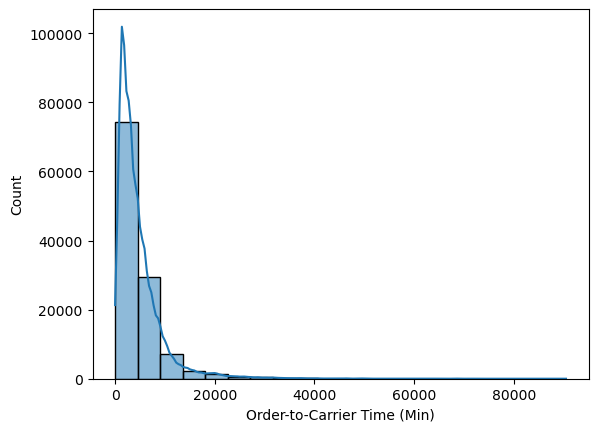

In [248]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Order-to-Carrier Time (Min)'], bins=20, kde = True)
plt.savefig('Order-to_Carrier Time- Extreme Values Check.png')

In [230]:
#Check the mean
df1['Order-to-Carrier Time (Min)'].mean()

4693.35102776771

In [231]:
#Check the median
df1['Order-to-Carrier Time (Min)'].median()

3216.366666666667

In [232]:
#Check the median
df1['Order-to-Carrier Time (Min)'].max()

90449.13333333332

In [233]:
#Clean the extreme values
df1 = df1[df1['Order-to-Carrier Time (Min)'] > 0]

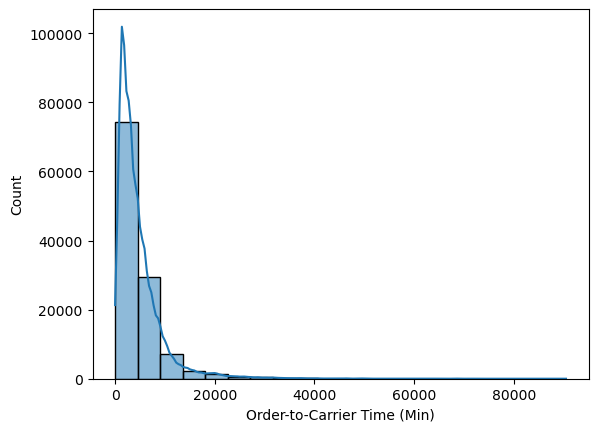

In [249]:
sns.histplot(df1['Order-to-Carrier Time (Min)'], bins=20, kde = True)
plt.savefig('Order-to-Carrier-Time- Extreme Values Check.png')

##### Price

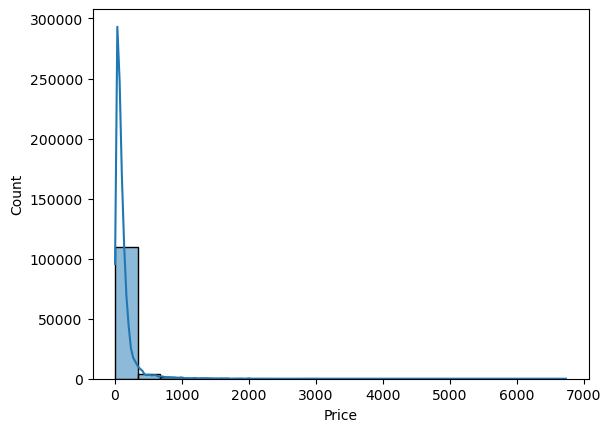

In [250]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Price'], bins=20, kde = True)
plt.savefig('Price- Extreme Values Check.png')

In [236]:
#Check the mean
df1['Price'].mean()

120.48257148767136

In [237]:
#Check the median
df1['Price'].median()

74.9

In [238]:
#Check the median
df1['Price'].max()

6735.0

##### Freight Value

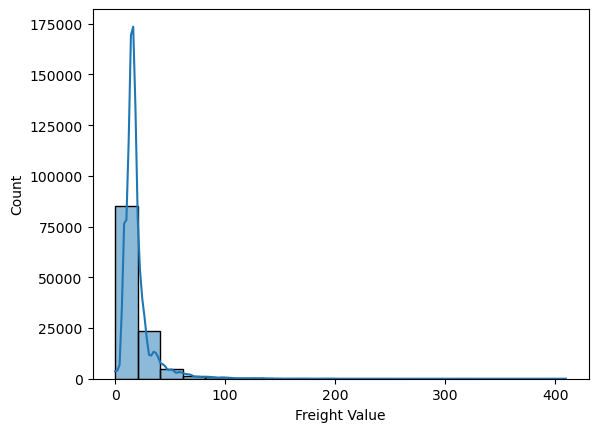

In [251]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Freight Value'], bins=20, kde = True)
plt.savefig('Freight Values-Extreme Values Check.png')

In [240]:
#Check the mean
df1['Freight Value'].mean()

19.99789850274141

In [241]:
#Check the median
df1['Freight Value'].median()

16.26

In [242]:
#Check the median
df1['Freight Value'].max()

409.68

In [244]:
df1.to_csv(r'C:\Users\dmlos\Achievement VI- Olist Business Analysis\Olist-Original Data (Kaggle)\df_geolocation_customers_sellers_items_orders_clean_31.csv')

## 3.) Data Prep for Regression Analysis

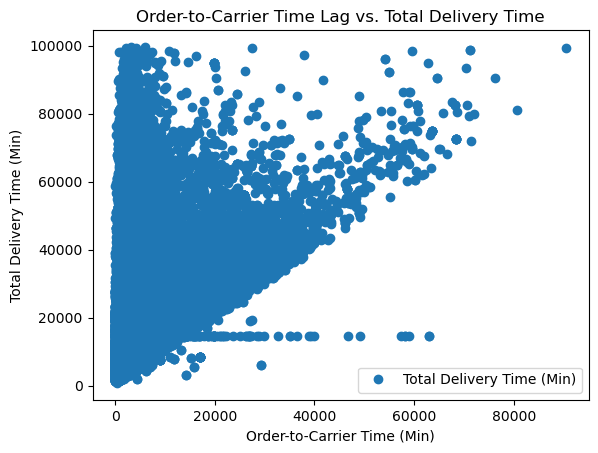

<Figure size 640x480 with 0 Axes>

In [252]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Order-to-Carrier Time (Min)', y='Total Delivery Time (Min)',style='o')
plt.title('Order-to-Carrier Time Lag vs. Total Delivery Time')  
plt.xlabel('Order-to-Carrier Time (Min)')  
plt.ylabel('Total Delivery Time (Min)')  
plt.show()
plt.savefig('Total Delivery Time & Order-to-Carrier Time Lage- Scatterplot.png')

In [173]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Order-to-Carrier Time (Min)'].values.reshape(-1,1)
y = df1['Total Delivery Time (Min)'].values.reshape(-1,1)

In [174]:
X

array([[ 723.43333333],
       [2314.03333333],
       [1129.63333333],
       ...,
       [2316.66666667],
       [4703.71666667],
       [1594.65      ]])

In [175]:
y

array([[ 2707.26666667],
       [14353.43333333],
       [ 2979.45      ],
       ...,
       [21248.66666667],
       [13127.71666667],
       [ 7718.06666667]])

In [176]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.) Regression Analysis

### 1.) Regression Analysis for Total Delivery Time and Order-to-Carrier Time Lag

In [177]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [178]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [179]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

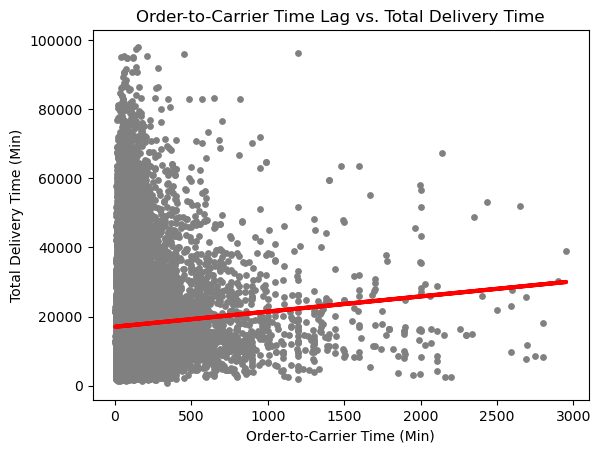

<Figure size 640x480 with 0 Axes>

In [253]:
#Create a plot for Delivery Time and Order-to-Carreier Time that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Order-to-Carrier Time Lag vs. Total Delivery Time')
plot_test.xlabel('Order-to-Carrier Time (Min)')
plot_test.ylabel('Total Delivery Time (Min)')
plot_test.show()
plt.savefig('Total Delivery-Order-to-Carrier Time Lag- Scatterplot.png')

In [181]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [182]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.03752558]]
Mean squared error:  116553862.16124456
R2 score:  0.17800666074596905


There is somewhat of a relationship between order-to-carrier times and total delivery times that gest progressively stronger in orders above 15,000 minutes between order and delivery to the carrier. Still, the majority of orders have order-to-carrier lag times of less than 15,000 minutes, making these factors difficult to draw strong, predictive conclusions from.

I had to remove extreme values on either end to improve the fit of the model. The low R2 Score and high MSE indicate that this is a poor model for predictive purposes. It's difficult to predict total delivery prices, based on order-to-carrier time lag using this model.

### 2.) Regression Analysis & Training/Test Data for Delivery Time and Review Score

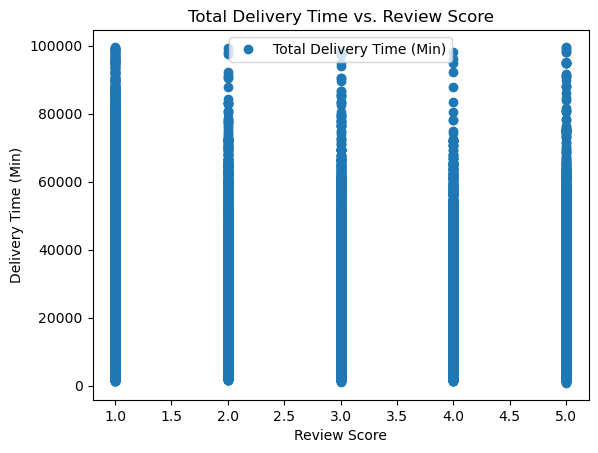

<Figure size 640x480 with 0 Axes>

In [254]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Review Score', y='Total Delivery Time (Min)',style='o')
plt.title('Total Delivery Time vs. Review Score')  
plt.xlabel('Review Score')  
plt.ylabel('Delivery Time (Min)')  
plt.show()
plt.savefig('Delivery Time-to-Review Score- Scatterplot.png')

In [135]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Total Delivery Time (Min)'].values.reshape(-1,1)
y = df1['Review Score'].values.reshape(-1,1)

In [136]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis- Delivery Time and Review Score

In [137]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [138]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [139]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

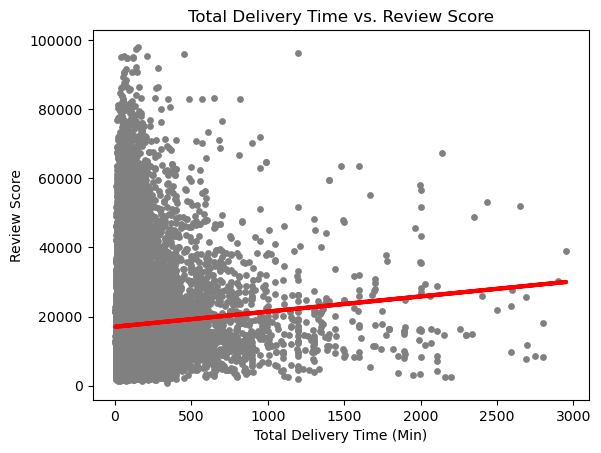

<Figure size 640x480 with 0 Axes>

In [255]:
#Create a plot for Delivery Time and Order-to-Carrier Time that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Delivery Time vs. Review Score')
plot_test.xlabel('Total Delivery Time (Min)')
plot_test.ylabel('Review Score')
plot_test.show()
plt.savefig('Delivery Time to Review Score Regression Plot.png')

In [141]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [142]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.33694711e-05]]
Mean squared error:  1.7528686077676905
R2 score:  0.0896652804586262


To a limited extent, there is an inverse relationship between delivery time and customer review scores. This only holds up to a point and the large number of outliers and values of the same score with vastly different elivery times indicates that other factors play a stronger role in customer satisfaction. This is a stronger model than the one that looked at order-to-carrier times and total delivery times, however, it's still not strong for predictive purposes, as indicated by its very low R2 Score (although it does have a relatively small MSE, which is a good sign.) 

### 3.) Regression Analysis & Training/Test Data for Price and Delivery Time

#### Regression Analysis & Training/Test Data for Price and Delivery Time

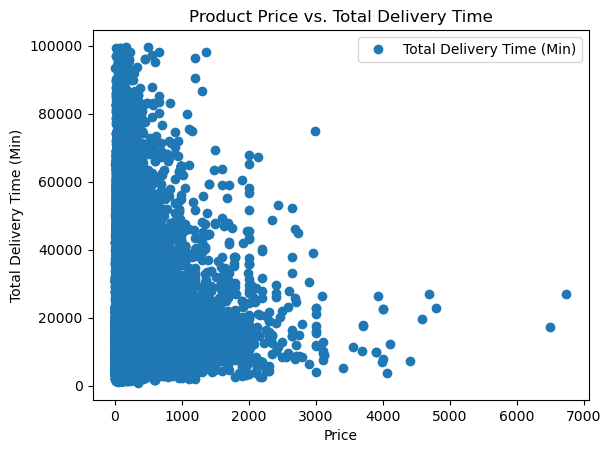

<Figure size 640x480 with 0 Axes>

In [256]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Price', y='Total Delivery Time (Min)',style='o')
plt.title('Product Price vs. Total Delivery Time')  
plt.xlabel('Price')  
plt.ylabel('Total Delivery Time (Min)')  
plt.show()
plt.savefig('Product Price to Delivery Time- Scatterplot.png')

In [186]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Price'].values.reshape(-1,1)
y = df1['Total Delivery Time (Min)'].values.reshape(-1,1)

In [187]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [188]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [189]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [190]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

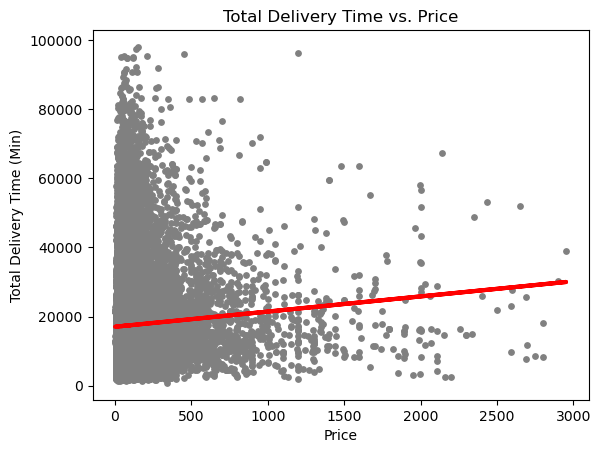

<Figure size 640x480 with 0 Axes>

In [257]:
#Create a plot for Delivery Time and Order-to-Carreier Time that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Delivery Time vs. Price')
plot_test.xlabel('Price')
plot_test.ylabel('Total Delivery Time (Min)')
plot_test.show()
plt.savefig('Delivery Time to Price- Scatterplot.png')

In [192]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [193]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.39429963]]
Mean squared error:  141090874.8579498
R2 score:  0.0049599626109861905


Again, the model here is not useful for predictive purposes as indivated by the low R2 score and very large MSE value. There is certainly a connection between price and delivery time once you get above a pricepoint of 1000 but, overall, there is not a strong relationship.